In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Simple RNN layer

In [0]:
X=[]
Y=[]

for i in range(6):
  lst=list(range(i,i+4))
  X.append(list(map(lambda c:[c/10],lst)))
  Y.append((i+4)/10)

X=np.array(X)
Y=np.array(Y)

for i in range(len(X)):
  print(X[i],Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [0]:
model=tf.keras.Sequential([
                           tf.keras.layers.SimpleRNN(units=10,return_sequences=False,input_shape=[4,1]),
                           tf.keras.layers.Dense(1)
])
# return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(X,Y,epochs=100,verbose=0)# verbose : 훈련과정에서의 출력

In [0]:
print(model.predict(X))

[[0.43792152]
 [0.5492632 ]
 [0.6425079 ]
 [0.7155023 ]
 [0.7684113 ]
 [0.80294365]]


In [0]:
model.predict(np.array([[[0.6],[0.7],[0.8],[0.9]]]))

array([[0.82154566]], dtype=float32)

LSTM layer

In [0]:
#multiplication problem with simple rnn

X=[]
Y=[]

for i in range (3000):
  lst=np.random.rand(100) #0~1사이의 100개의 랜덤한 숫자
  idx=np.random.choice(100,2,replace=False) # 두개의 인덱스 뽑음
  zeros=np.zeros(100);
  zeros[idx]=1 #one-hot-encoding

  X.append(np.array(list(zip(zeros,lst))))
  Y.append(np.prod(lst[idx])) # 마킹인덱스가 1인 값만 서로 곱해서 Y에 저장

print(X[0],Y[0])

[[0.         0.36687092]
 [0.         0.66176059]
 [0.         0.26485915]
 [0.         0.13824336]
 [0.         0.00879103]
 [0.         0.76405315]
 [0.         0.74779602]
 [0.         0.55115887]
 [0.         0.95599714]
 [0.         0.07372968]
 [0.         0.90291982]
 [0.         0.89448286]
 [0.         0.93423492]
 [0.         0.22540999]
 [0.         0.61363878]
 [0.         0.54581219]
 [0.         0.10904944]
 [0.         0.42457343]
 [1.         0.56189408]
 [0.         0.84886374]
 [0.         0.16283443]
 [0.         0.7608974 ]
 [0.         0.65614942]
 [0.         0.48679464]
 [0.         0.42511512]
 [0.         0.97420331]
 [0.         0.31447082]
 [0.         0.26099306]
 [0.         0.24188882]
 [0.         0.38740324]
 [0.         0.43955441]
 [0.         0.30672809]
 [0.         0.74128453]
 [0.         0.05602712]
 [0.         0.35415592]
 [0.         0.38798699]
 [0.         0.05287865]
 [0.         0.43728474]
 [0.         0.01695791]
 [0.         0.0345497 ]


In [0]:
model=tf.keras.Sequential([
                           tf.keras.layers.SimpleRNN(units=30,return_sequences=True,input_shape=[100,2]),
                           tf.keras.layers.SimpleRNN(units=30),
                           tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='mse')

In [0]:
X=np.array(X)
Y=np.array(Y)

In [0]:
history=model.fit(X[:2560],Y[:2560],epochs=100,validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0682 - val_loss: 0.0482
Epoch 2/100
2048/2048 [==============================] - 2s 1ms/sample - loss: 0.0543 - val_loss: 0.0482
Epoch 3/100
2048/2048 [==============================] - 2s 1ms/sample - loss: 0.0506 - val_loss: 0.0485
Epoch 4/100
2048/2048 [==============================] - 2s 1ms/sample - loss: 0.0509 - val_loss: 0.0484
Epoch 5/100
2048/2048 [==============================] - 2s 1ms/sample - loss: 0.0498 - val_loss: 0.0504
Epoch 6/100
2048/2048 [==============================] - 2s 1ms/sample - loss: 0.0497 - val_loss: 0.0483
Epoch 7/100
2048/2048 [==============================] - 2s 1ms/sample - loss: 0.0491 - val_loss: 0.0477
Epoch 8/100
2048/2048 [==============================] - 2s 1ms/sample - loss: 0.0494 - val_loss: 0.0480
Epoch 9/100
2048/2048 [==============================] - 2s 1ms/sample - loss: 0.0489 - val_loss: 0.0486
Epoch 10

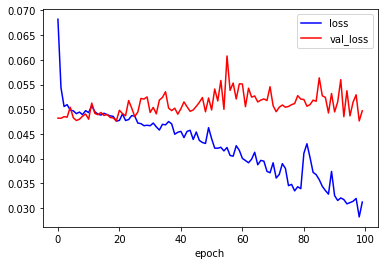

In [0]:
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r-',label='val_loss')
plt.xlabel('epoch');
plt.legend()
plt.show() #overfitted

In [0]:
model.evaluate(X[2560:],Y[2560:])

fail=0

prediction=model.predict(X[2560:])

for i in range(len(prediction)):
  if abs(prediction[i][0]-Y[2560+i])>0.04:
    fail+=1

print('correctness : '+str((440-fail)/440))

440/440 [==============================] - 0s 681us/sample - loss: 0.0507
correctness : 0.16590909090909092


In [0]:
model=tf.keras.Sequential([
                           tf.keras.layers.LSTM(units=30,return_sequences=True,input_shape=[100,2]),
                           tf.keras.layers.LSTM(units=30),
                           tf.keras.layers.Dense(units=1)    
])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='mse')

In [0]:
history=model.fit(X[:2560],Y[:2560],epochs=100,validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0533 - val_loss: 0.0488
Epoch 2/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0494 - val_loss: 0.0501
Epoch 3/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0492 - val_loss: 0.0478
Epoch 4/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0489 - val_loss: 0.0479
Epoch 5/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0493 - val_loss: 0.0482
Epoch 6/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0488 - val_loss: 0.0480
Epoch 7/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0488 - val_loss: 0.0481
Epoch 8/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0487 - val_loss: 0.0480
Epoch 9/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0487 - val_loss: 0.0483
Epoch 10

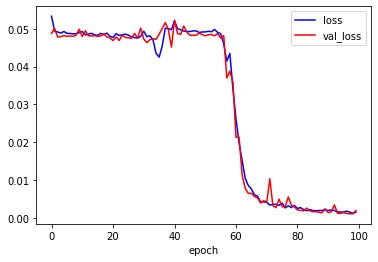

In [0]:
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r-',label='val_loss')
plt.xlabel('epoch');
plt.legend()
plt.show() 

In [0]:
model.evaluate(X[2560:],Y[2560:])

fail=0

prediction=model.predict(X[2560:])

for i in range(len(prediction)):
  if abs(prediction[i][0]-Y[2560+i])>0.04:
    fail+=1

print('correctness : '+str((440-fail)/440))

440/440 [==============================] - 1s 2ms/sample - loss: 0.0026
correctness : 0.6136363636363636


GRU layer

In [0]:
model=tf.keras.Sequential([
                           tf.keras.layers.GRU(units=30,return_sequences=True,input_shape=[100,2]),
                           tf.keras.layers.GRU(units=30),
                           tf.keras.layers.Dense(units=1)
])

model.compile(optimizer='adam',loss='mse')

In [0]:
history=model.fit(X[:2560],Y[:2560],epochs=100,validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0595 - val_loss: 0.0480
Epoch 2/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0495 - val_loss: 0.0484
Epoch 3/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0494 - val_loss: 0.0486
Epoch 4/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0492 - val_loss: 0.0481
Epoch 5/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0490 - val_loss: 0.0482
Epoch 6/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0490 - val_loss: 0.0489
Epoch 7/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0491 - val_loss: 0.0491
Epoch 8/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0492 - val_loss: 0.0485
Epoch 9/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0492 - val_loss: 0.0480
Epoch 10

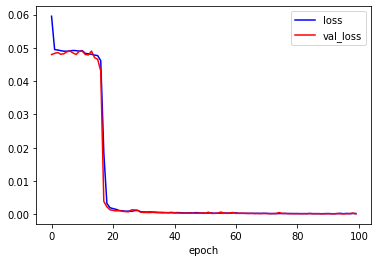

In [0]:
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r-',label='val_loss')
plt.xlabel('epoch');
plt.legend()
plt.show() 

In [0]:
model.evaluate(X[2560:],Y[2560:])

fail=0

prediction=model.predict(X[2560:])

for i in range(len(prediction)):
  if abs(prediction[i][0]-Y[2560+i])>0.04:
    fail+=1

print('correctness : '+str((440-fail)/440))

440/440 [==============================] - 1s 2ms/sample - loss: 1.6231e-04
correctness : 0.990909090909091
